In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
chunk_size = 1000  # Adjust the chunk size as needed
chunks = []
try:
    for chunk in pd.read_csv('/content/sample_data/drug_review_dataset_with_sentiment.csv', chunksize=chunk_size):
        chunks.append(chunk)
except pd.errors.ParserError as e:
    print(f"Error: {e}")

In [ ]:
df = pd.concat(chunks, ignore_index=True)

In [ ]:
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment,sentiment_label
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,arb blocker,0.000000,neutral
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,NaN,0.168333,positive
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,NaN,0.067210,positive
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,NaN,0.179545,positive
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,NaN,0.194444,positive


In [ ]:
df.describe()

,Unnamed: 0,rating,usefulCount,sentiment
count,161297.000000,161297.000000,161297.000000,161297.000000
mean,115923.585305,6.994377,28.004755,0.064847
std,67004.445170,3.272329,36.403742,0.222437
min,2.000000,1.000000,0.000000,-1.000000
25%,58063.000000,5.000000,6.000000,-0.043264
50%,115744.000000,8.000000,16.000000,0.058202
75%,173776.000000,10.000000,36.000000,0.173722
max,232291.000000,10.000000,1291.000000,1.000000


In [ ]:
df.dtypes

,0
Unnamed: 0,int64
drugName,object
condition,object
review,object
rating,float64
date,object
usefulCount,int64
drug_class,object
sentiment,float64
sentiment_label,object


In [ ]:
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [ ]:
df.dtypes

,0
id,int64
drugName,object
condition,object
review,object
rating,float64
date,object
usefulCount,int64
drug_class,object
sentiment,float64
sentiment_label,object


In [ ]:
df.isnull().sum()

,0
id,0
drugName,0
condition,899
review,0
rating,0
date,0
usefulCount,0
drug_class,137837
sentiment,0
sentiment_label,0


In [ ]:
df = df.dropna(subset=['condition', 'drug_class'])

In [ ]:
df.isnull().sum()

,0
id,0
drugName,0
condition,0
review,0
rating,0
date,0
usefulCount,0
drug_class,0
sentiment,0
sentiment_label,0


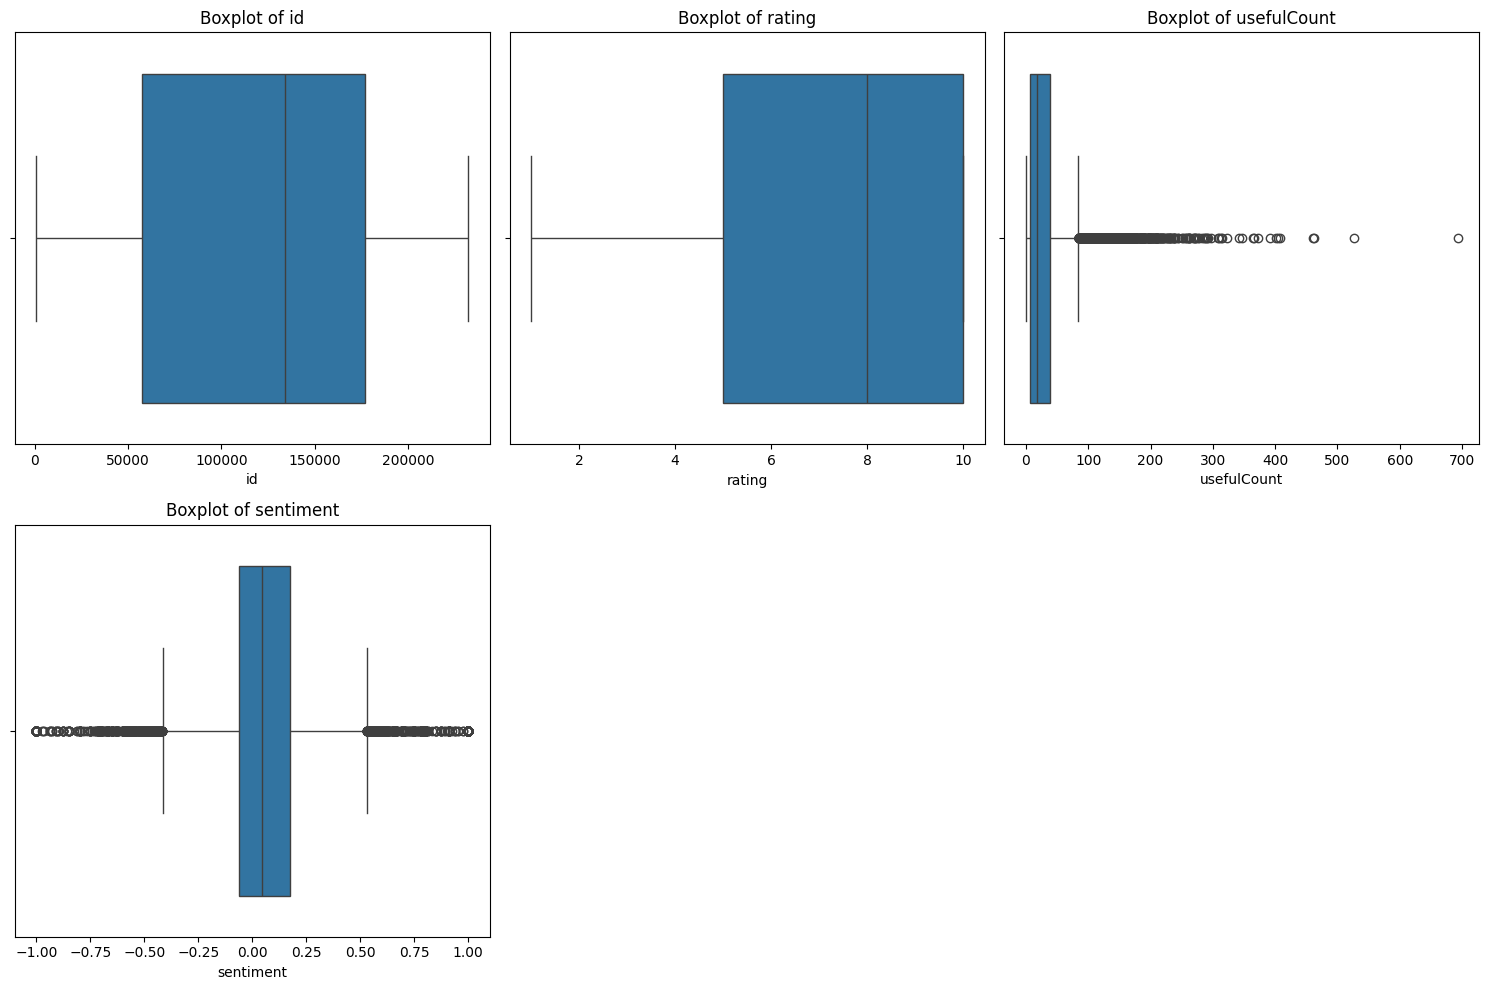

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Set up the matplotlib figure
plt.figure(figsize=(15, 10))

# Create a boxplot for each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i + 1)  # Adjust the number of columns as needed
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [ ]:
Q1 = df['usefulCount'].quantile(0.25)
Q3 = df['usefulCount'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df = df[(df['usefulCount'] >= lower_bound) & (df['usefulCount'] <= upper_bound)]

In [ ]:
df.head()

,id,drugName,condition,review,rating,date,usefulCount,drug_class,sentiment,sentiment_label
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,arb blocker,0.000000,neutral
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10.0,"March 14, 2015",32,antifungal (except metronidazole),0.074107,positive
15,81890,Liraglutide,Obesity,"""I have been taking Saxenda since July 2016. ...",9.0,"January 19, 2017",20,oral hypoglycemics,0.209259,positive
21,231466,Trazodone,Insomnia,"""I have insomnia, it&#039;s horrible. My story...",10.0,"April 3, 2016",43,opiod analgesics,0.061503,positive
24,213649,Tioconazole,Vaginal Yeast Infection,"""Do not use the cream that comes with this. It...",1.0,"April 17, 2017",7,antifungal (except metronidazole),0.000000,neutral


In [ ]:
#1. What is the most popular drug?
most_popular_drug = df.loc[df['usefulCount'].idxmax(), 'drugName']
print("Most popular drug:", most_popular_drug)


Most popular drug: Trazodone


In [ ]:
#2. What are the groups/classification of drugs used?
drug_classes = df['drug_class'].unique()
print("Drug classes:", drug_classes,)

Drug classes: ['arb blocker' 'antifungal (except metronidazole)' 'oral hypoglycemics'
 'opiod analgesics' 'antibiotic' 'anti-anxiety'
 'h2 blockers (anti-ulcers)' 'beta blockers' 'ace inhibitor'
 'alpha blocker' 'corticosteroid (prednisone)' 'thrombolytics'
 'antipyschotics (phenothiazine)' 'antibiotic(penicillins)' 'barbiturate'
 'calcium channel blocker' 'anesthetic' 'pituitary hormone'
 'antibiotic (cephalosporins)' 'beta blocker'
 'neuromuscular blocking agents' 'anticoagulants'] /n


In [ ]:
#3.Which Drug has the best review?
best_review_drug = df.loc[df['rating'].idxmax(), 'drugName']
print("Drug with the best review:", best_review_drug)


Drug with the best review: Aripiprazole


In [ ]:
#4. How many drugs do we have?
total_drugs = df['drugName'].nunique()
print("Total number of drugs:", total_drugs)

Total number of drugs: 383


In [ ]:
#5. The number of drugs per condition
drugs_per_condition = df.groupby('condition').size()
print("Number of drugs per condition:")
print(drugs_per_condition)


Number of drugs per condition:
condition
10</span> users found this comment helpful.     1
13</span> users found this comment helpful.     1
18</span> users found this comment helpful.     1
36</span> users found this comment helpful.     1
4</span> users found this comment helpful.      1
                                               ..
me                                              1
mis                                             5
moterol / mometasone)                          29
ungal Infection Prophylaxis                     1
ungal Pneumonia                                 1
Length: 424, dtype: int64


In [ ]:
#6. Number of patients that searched on a particular drug
total_patients_per_drug = df[['drugName', 'usefulCount']]
print("Number of patients that searched on each drug:")
print(total_patients_per_drug)


Number of patients that searched on each drug:
              drugName  usefulCount
0            Valsartan           27
7         Aripiprazole           32
15         Liraglutide           20
21           Trazodone           43
24         Tioconazole            7
...                ...          ...
161251      Metoprolol           39
161275   Ciprofloxacin            1
161276       Lorazepam            0
161285     Alcaftadine           12
161293  Metoclopramide           34

[21924 rows x 2 columns]
